In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.keras import TqdmCallback

import statistics

In [3]:
train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)

In [4]:
#!wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip

In [5]:
input_shape = (150, 150, 3)
image_size = (150, 150)
batch_size = 20
inputs = keras.Input(shape=input_shape)

In [6]:
# Defining Model

In [7]:
# Conv layer
base = tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
# Max pooling
vectors = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=input_shape)(base)
# Flatten
flat = tf.keras.layers.Flatten()(vectors)
# Dense
dense = keras.layers.Dense(64, activation="relu")(flat)
# Output
outputs = keras.layers.Dense(1, activation="sigmoid")(dense)
model = keras.Model(inputs, outputs)

In [8]:
# Model summary
model.summary() #Model.summary(line_length=None, positions=None, print_fn=None)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

In [9]:
# Define Optimizer & Loss 
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

In [10]:
# Training Set
train_ds = train_generator.flow_from_directory(
    './train',
    class_mode='binary',
    target_size=image_size,
    batch_size=batch_size
)

Found 20000 images belonging to 2 classes.


In [11]:
# Validation Set
val_ds = validation_generator.flow_from_directory(
    './validation',
    class_mode='binary',
    target_size=image_size,
    batch_size=batch_size
)

Found 5000 images belonging to 2 classes.


In [12]:
# Model Compilation
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [13]:
# Model Fit & History
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=epochs,
    verbose=0,
    validation_data=val_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

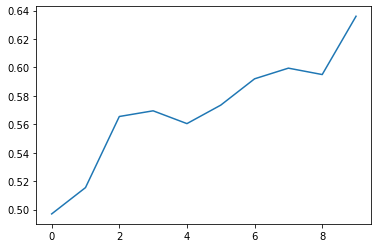

In [14]:
plt.plot(history.history['accuracy'], label='train') #Plot train accuracy

In [16]:
median_accuracy = statistics.median(history.history['accuracy'])
median_accuracy

0.5715000033378601

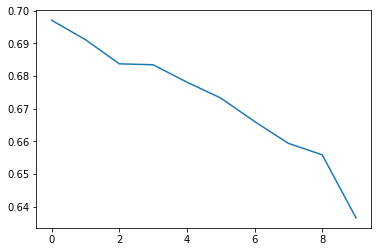

In [17]:
plt.plot(history.history['loss'], label='train loss') #Plot train loss

In [18]:
stddv_loss = statistics.stdev(history.history['loss'])
stddv_loss

0.01831682961650623

In [19]:
# Augmentation
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_generator.flow_from_directory(
    './train',
    class_mode='binary',
    target_size=image_size,
    batch_size=batch_size,
)

Found 20000 images belonging to 2 classes.


In [20]:
# Model Compilation for Augmentation
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [21]:
# Model Fit & History for Augmentation
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=epochs,
    verbose=0,
    validation_data=val_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

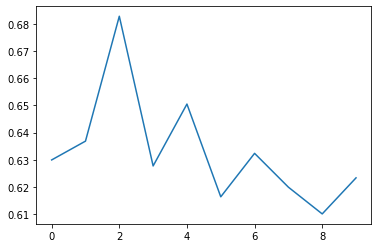

In [22]:
plt.plot(history.history['val_loss'], label='val_loss') #Plot validation loss

In [23]:
mean_val_loss = statistics.mean(history.history['val_loss'])
mean_val_loss

0.632989901304245

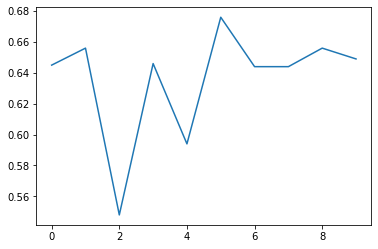

In [24]:
plt.plot(history.history['val_accuracy'], label='val_accuracy') #Plot validation accuracy

In [25]:
mean_val_accuracy = statistics.mean(history.history['val_accuracy'][6:10])
mean_val_accuracy

0.6482499986886978